# The Law of Large Numbers & Limit Central Theorem

### The Law of Large Numbers (LLN)

The Law of Large Numbers (LLN) states that as the size of a sample increases, the sample mean will converge to the true population mean 𝜇.

### Central Limit Theorem (CLT)

The Central Limit Theorem (CLT) states that the sum (or mean) of a large number of independent and identically distributed random variables, regardless of their original distribution, will be approximately normally distributed.

## 1. Verify the Law of Large Numbers

The Law of Large Numbers states that:

“The average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed” (Dekking, Michel. 2005. A Modern Introduction to Probability and Statistics)

We can get a feeling about what it means by applying it to a dataset. Let’s read the Online Retail csv file and examine it:

大数定律指出：

“大量试验获得的结果的平均值应该接近预期值，并且随着进行更多试验，结果往往会变得更接近预期值 E(x)

The Law of Large Numbers (LLN):
The Law of Large Numbers is a fundamental theorem in probability and statistics. It comes in two forms: the Weak Law and the Strong Law, but both essentially express the same idea—that as the number of trials or observations increases, the sample average of those observations will get closer to the expected value (the true mean) of the underlying distribution. 随着试验或观察次数的增加，这些观察结果的样本平均值将越来越接近其分布的预期值（真实平均值）。

- Expected values = True mean: The expected value of a random variable is the **long-run average or mean of that variable over many, many trials.  

In [ ]:
__author__ = "Bing Huang"
__email__ = "Binghuang1990@gmail.com"

In [28]:
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [30]:
df['Country'].unique()   # an array

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [31]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [32]:
df.shape

(541909, 8)

We have 8 columns showing:

- InvoiceNo: invoice number
- StockCode: code unique to the specific item
- Description: description of the item
- Quantity: quantity of items pruchased
- InvoiceDate: date of purchase
- UnitPrice: unit price of the item pruchase
- CustomerID: Unique ID attached to a specific customer
- Country: Country of Purchase

For example, let’s apply the law of Large Number to this dataset. It could translate to:

“The average of the daily retail store income from a large number of days should be close to the expected value (expected daily income) and will tend to become closer to the expected value as more days are taken into account.”

So now let’s investigate if this is true!

## Compute daily sales

The first step is to build a daily sales dataframe from the raw data we loaded.

We start by converting the InvoiceDate column to a `datetime` column:

In [33]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.date

# format="%m/%d/%Y %H:%M"   original format looks like this way
# .dt.date  this means only extracts the date part from the 'datetime' object, onlythe date (year, month, and day)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


We only want the day, month, and year from the invoice date, but the original data also contained values for hours and minutes. Conveniently, the date is reformatted as YYYY-MM-DD by default.

Finally, we can compute the total daily sales of the shop:

In [34]:
df['revenue'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [35]:
df_grouped = df.drop(['CustomerID', 'UnitPrice'], axis=1).groupby(['InvoiceDate']).sum()

df_grouped

,Quantity,revenue
InvoiceDate,,
2010-12-01,26814,58635.56
2010-12-02,21023,46207.28
2010-12-03,14830,45620.46
2010-12-05,16395,31383.95
2010-12-06,21419,53860.18
...,...,...
2011-12-05,44119,57751.32
2011-12-06,29026,54228.37
2011-12-07,39612,75076.22


Let's plot a histogram of these daily sales:

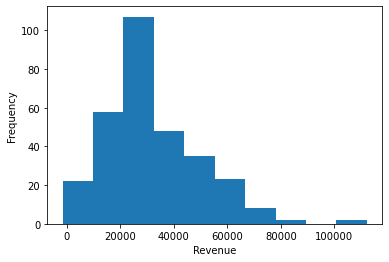

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df_grouped["revenue"])
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.show()

#### the law of large numbers on the daily sales dataframe

Create a list named `avg_daily_revenues` that contains the daily average revenue, taking into account 2, 3, 4, … 300 days, sampled randomly.

**Hint:** Checkout the train-test split exercise (STI_D1_EX1_Train_Test_Split_on_the_Retail_Dataset) for a demonstration on how to sample randomly from a dataframe.

- Loop over the desired range of days (2 to 305).
- Randomly sample the specified number of days from the DataFrame.
- Calculate the average revenue for each sample.
- Store each average in the avg_daily_revenues list.

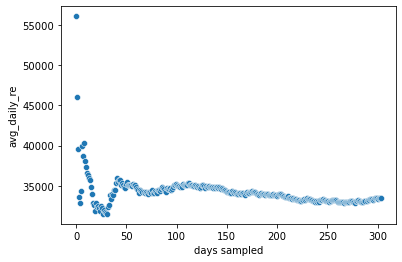

In [50]:
# your code here
import seaborn as sns
import matplotlib.pyplot as plt


avg_daily_revenues = []

for i in range(2, 306):  # from 2 到 305 day
    sampled_days = df_grouped['revenue'].sample(n = i, random_state = 100, replace =True)   # randomly select i days
    avg_revenue  = sampled_days.mean()          # calcualte these days' avg values
    avg_daily_revenues.append(avg_revenue)
    
sns.scatterplot(data = avg_daily_revenues)
plt.xlabel('days sampled')
plt.ylabel('avg_daily_re')
plt.show()

In [45]:
mean_rev = df_grouped['revenue'].mean()
mean_rev

31959.829291803275

## Central Limit Theorem

The Central Limit Theorem states that the normalized sum of independent random variables tends towards a normal distribution as the number of independent random variables increases.

For our daily sales example, that could translate to:

If I compute a large number of the means of daily sales over n days (taken randomly) and plot their histogram, it will look like a gaussian distribution. The more samples I take for calculating the means, the more their distributions will look like a Gaussian.

Let’s test this by computing:

- 10000 sample means of daily sales with sampling size = 1
- 10000 sample means of daily sales with sampling size = 10
- 10000 sample means of daily sales with sampling size = 100
- 10000 sample means of daily sales with sampling size = 1000

and plot the histograms for each distributions. As the number of samples in each mean increases, the distribution should look more and more like a Gaussian.

In [46]:
df_grouped.head()

,Quantity,revenue
InvoiceDate,,
2010-12-01,26814,58635.56
2010-12-02,21023,46207.28
2010-12-03,14830,45620.46
2010-12-05,16395,31383.95
2010-12-06,21419,53860.18


### 10000 sample means of daily sales with sampling size = 1
从数据集中随机抽取10000次，每次抽取1天的数据，然后计算每次抽取的日销售额的均值。因为样本大小为1，所以每次抽取的均值实际上就是当天的销售额。

In [62]:
# 10000 sample means of daily sales with sampling size = 1

df_1 = df_grouped['revenue'].sample(n = 10000, random_state = 100, replace = True) 
# replace = True 抽取之后再放回继续抽

,InvoiceDate,revenue
0,2010-12-10,57404.91
1,2011-11-11,54835.51
2,2011-03-14,25864.59
3,2011-02-11,20387.28
4,2011-02-27,9491.05
...,...,...
9995,2011-11-30,59150.98
9996,2011-06-17,20800.72
9997,2011-10-09,11922.24
9998,2011-03-14,25864.59


<AxesSubplot:ylabel='Count'>

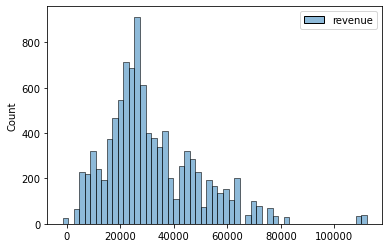

In [66]:
sns.histplot(df_1)

### 10000 sample means of daily sales with sampling size = 10
这是指从数据集中随机抽取10000次，每次抽取10天的数据，然后计算这10天的销售额的平均值。最后我们会得到10000个均值。

In [79]:
avg_10000 =[]

for i in range(1,10001):
    avg_i= df_grouped['revenue'].sample(n = 10, replace = True).mean()
    avg_10000.append(avg_i)
    
avg_10000[:10] # 10000 sampling 的均值 

[24108.023999999998,
 30543.789,
 29945.24,
 30527.019,
 34215.919,
 32878.341,
 32828.267,
 32352.172099999996,
 32153.643000000004,
 42812.233]

<AxesSubplot:ylabel='Count'>

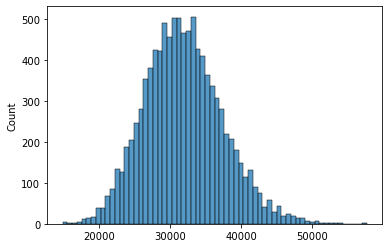

In [80]:
sns.histplot(avg_10000)

In [ ]:
# 10000 sample means of daily sales with sampling size = 10

### 10000 sample means of daily sales with sampling size = 100
从数据集中随机抽取10000次，每次抽取1000天的数据，然后计算这1000天的销售额的平均值。最后我们会得到10000个均值。

<AxesSubplot:ylabel='Count'>

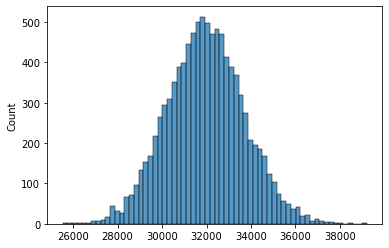

In [83]:
avg_10000 =[]

for i in range(1,10001):
    avg_i= df_grouped['revenue'].sample(n = 100, replace = True).mean()
    avg_10000.append(avg_i)
    
sns.histplot(avg_10000)

### 10000 sample means of daily sales with sampling size = 1000
从数据集中随机抽取10000次，每次抽取1000天的数据，然后计算这1000天的销售额的平均值。最后我们会得到10000个均值。

<AxesSubplot:ylabel='Count'>

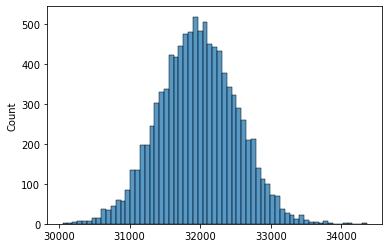

In [85]:
avg_10000 =[]

for i in range(1,10001):
    avg_i= df_grouped['revenue'].sample(n = 1000, replace = True).mean()
    avg_10000.append(avg_i)
    
sns.histplot(avg_10000)

Summary:

Sample Size = 1: The histogram shows the original data's distribution, with wide variance and skewed shape.

Sample Size = 10: The histogram starts to narrow, with the mean of the sample means closer to the true population mean.

Sample Size = 100: The histogram becomes bell-shaped, more tightly centered around the true mean.

Sample Size = 1000: The histogram is very tight and nearly perfectly normal, with the sample means almost identical to the true population mean.

These changes in the shape and spread of the distribution of sample means as the sample size increases illustrate both the LLN (convergence to the mean) and the CLT (approaching a normal distribution).